# Домашнее задание 4

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_4

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \triangle_d} f(x) = \frac{1}{2}x^T A x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица (уже умеем генерировать) с $L =1000$, $\mu = 1$, а $\triangle_d$ - вероятностный симплекс:
$$
\triangle_d = \{x ~|~ x_i \geq 0, \sum_{i=1}^d x_i = 1\}.
$$

__(а)__ Для такой задачи напишите итерацию зеркального спуска с дивергенцией Брегмана, порожденной энтропийной функцией. Найдите выражение для итерации метода в явном виде (без подсчетов $\arg\min$).

#### Решение:
Рассмотрим следующую задачу: $\frac{1}{2} \gamma <(A+A^T)x^k, x> + \sum\limits_{i=1}^{d}x_i ln\frac{x_i}{x_i^k} \rightarrow min \\ $
Заметим, что $\frac{1}{2} \gamma <(A+A^T)x^k, x> = \sum\limits_{i = 1}^{d}\frac{1}{2}\gamma <\sum\limits_{j=1}^{d}(a_{ij}+a_{ji})x_j^k, x_i> $. $\\$  Тогда продифференцируем: $\forall i \rightarrow (\frac{1}{2}\gamma \sum\limits_{j=1}^{d}(a_{ij}+a_{ji})x_j^k) + (1 + ln\frac{x_i}{x_i^k}) = 0 \Rightarrow x^i = x_i^k\cdot exp(-\frac{1}{2}\gamma \sum\limits_{j=1}^{d}(a_{ij}+a_{ji})x_j^k - 1) \\ $

Применим условие нормировки (чтобы спроецировать на симплекс): 
$x^i = \frac{x_i^k\cdot exp(-\frac{1}{2}\gamma \sum\limits_{j=1}^{d}(a_{ij}+a_{ji})x_j^k - 1)}{\sum\limits_{i = 1}^d[x_i^k\cdot exp(-\frac{1}{2}\gamma \sum\limits_{j=1}^{d}(a_{ij}+a_{ji})x_j^k - 1)]}$

__(б)__ Реализуйте метод зеркального спуска из пункта (а). Постройте для него график сходимости по времени и по итерациям. В качестве критерия сходимости используйте:
$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(x^i)$. Найдите выражение в явном виде для подсчета $\text{gap}(x^k)$.

In [1]:
import numpy as np
from math import log, exp, ceil, sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
import time 
from scipy.stats import special_ortho_group  


In [2]:
## Adding constants
L = 1000
mu = 1
gamma = 1/L
d = 100
E = np.eye(d)


In [3]:
def generate_matrix(d_local, mu_local, L_local):
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu_local, L_local, d_local)
        diagonal_entries[0] = mu_local
        diagonal_entries[1] = L_local
        D = np.diag(diagonal_entries)
        m = special_ortho_group.rvs(d_local)
        A = (np.linalg.inv(m).dot(D)).dot(m)
        np.set_printoptions(suppress=True)
        if (is_pos_def(A-mu_local*E)):
            i += 1
    return A
    
def is_pos_def(x): #проверка положительной определённости
    return np.all(np.linalg.eigvals(x) > 0)

def gradient(x): 
    return A.dot(x)

def normalizing(x):    # нормировка на L1 - шар
    norm = sum(i for i in x)
    for i in range(d):
        x[i] = x[i]/norm
    return(x)
    
def gap(x, grad):
    x_new = np.zeros(d)
    x_new[np.argmin(grad)] = 1
    return grad.dot(x-x_new)

def expon(x):
    expon_vector = []
    Ax = A.dot(x)
    expon_vector = np.exp(-1-gamma*Ax)
    return expon_vector
    
def mirror_descent(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogMD = []
    for j in range(n_iter):
        exponenta = expon(vector)
        #for i in range(d):
        #    vector[i] = vector[i]*exponenta[i]
        vector = vector * exponenta
        vector = normalizing(vector)
        grad = gradient(vector)
        values_y.append(gap(vector, grad))
        values_x.append(j+1)
        vector_list.append(vector)
        timeprogMD.append(time.time() - begin_time)
    return values_x, values_y, vector_list, timeprogMD

In [4]:
start = np.ones(d)/d
A = generate_matrix(d, mu, L)

In [5]:
values_x_md, values_y_md, vector, timeMD = mirror_descent(start, gamma, 10001)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/3365938320.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


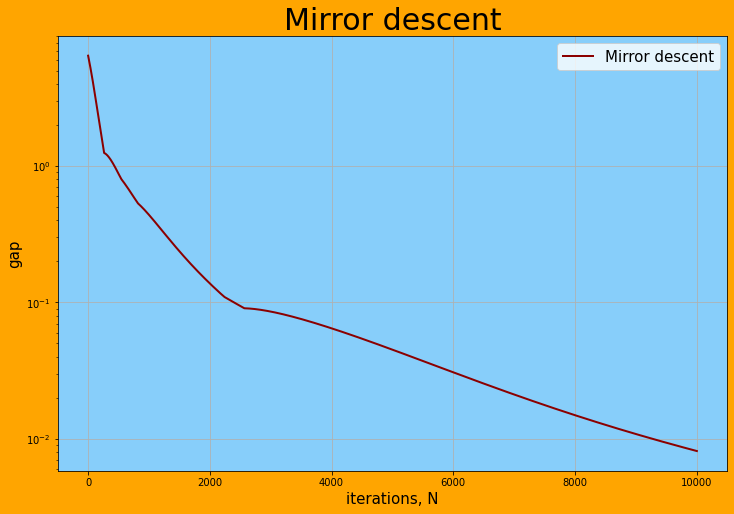

In [6]:
plt.figure(figsize=(12,8), facecolor = "orange") 
plt.plot(values_x_md, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Mirror descent', fontsize=30)
plt.grid()



__(в)__ Для этой же задачи напишите итерацию метода Франка-Вульфа. Реализуйте этот метод. Постройте для него график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска. Сделайте вывод.

In [7]:
def Frank_Wolfe(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogFW = []
    grad = gradient(vector)
    for j in range(n_iter):
        s = np.zeros(d)
        s[np.argmin(grad)] = 1
        vector = vector + 2/(j+1)*(s - vector)
        grad = gradient(vector)
        values_y.append(gap(vector, grad))
        values_x.append(j+1)
        vector_list.append(vector)
        timeprogFW.append(time.time() - begin_time)
    return values_x, values_y, vector_list, timeprogFW

In [8]:
values_x_fw, values_y_fw, vector_fw, timeFW = Frank_Wolfe(start, gamma, 10001)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/3818540508.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


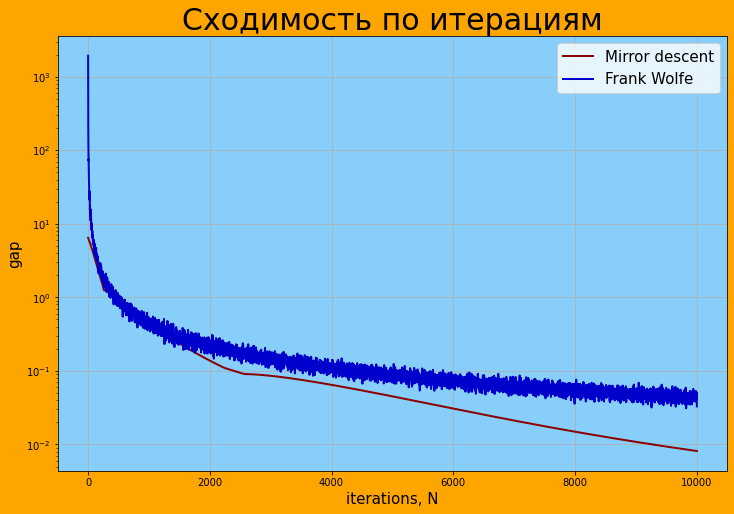

In [9]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_md, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
line2, = plt.plot(values_x_fw, values_y_fw, 'mediumblue',  linewidth=2, label = 'Frank Wolfe')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Сходимость по итерациям', fontsize=30)
plt.grid()



Сделаем сходимость по времени, проведем 50000 итераций метода Франка-Вульфа

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/3130090992.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


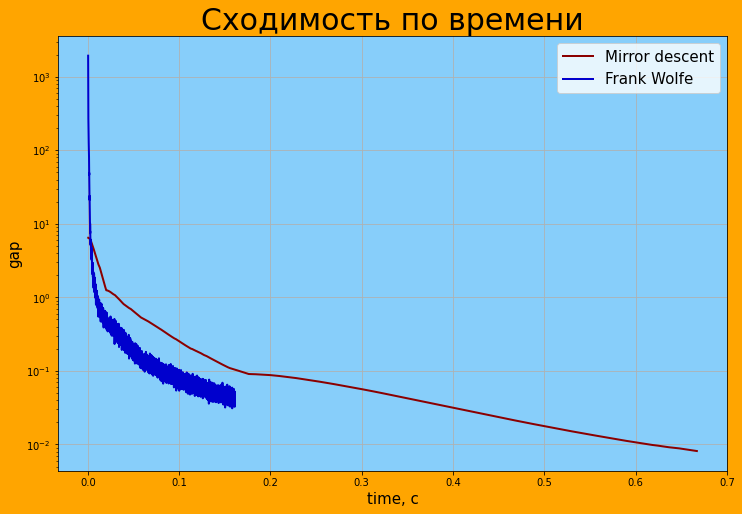

In [10]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(timeMD, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
line2, = plt.plot(timeFW, values_y_fw, 'mediumblue',  linewidth=2, label = 'Frank Wolfe')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("time, с", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Сходимость по времени', fontsize=30)
plt.grid()



#### Вывод: 
Метод Франка-Вульфа работает очень быстро, по времени эффективнее, чем Зеркальный спуск. В свою очередь, по количеству итераций Зеркальный спуск показал лучший результат

__Бонусные пункты__

__(г)__ Реализуйте метод градиентного спуска для нашей задачи. Для этого найдите в Интернете алгоритм евклидовой проекции на вероятностный симплекс. Постройте для градиентного спуска с евклидовой проекцией график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска и метода Франка-Вульфа. Сделайте вывод.

In [11]:
def projection(y):
    u = np.copy(y)
    u = np.sort(u)[::-1]
    rho = 1
    summa = 1 - u[0]
    summa2 = summa
    for j in range(1, d):
        summa -= u[j]
        if (u[j] + 1/(j+1)*(summa) > 0 ):
            rho = j + 1
            summa2 = summa
    llambda = 1/rho*(summa2)
    x = []
    for j in range(len(y)): 
        x.append(max(y[j] + llambda, 0))
    return x

def gradient_descent_proj(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    grad = gradient(vector)
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector = projection(vector + diff)
        grad = gradient(vector)
        values_y.append(gap(vector, grad))
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, vector, timeprogGDP

In [12]:
values_x_gdp, values_y_gdp, vector_gdp, time_gdp = gradient_descent_proj(start, gamma, 10001)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/4112383411.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/4112383411.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


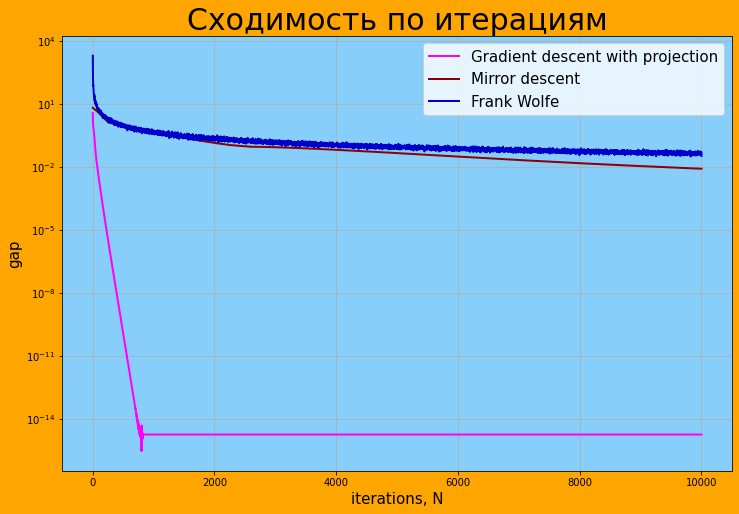

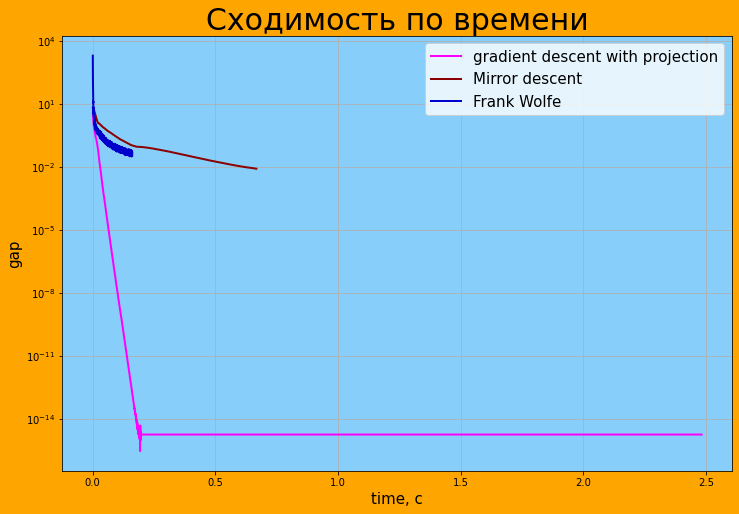

In [13]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line3, = plt.plot(values_x_gdp, values_y_gdp, 'magenta',  linewidth=2, label = 'Gradient descent with projection')
line1, = plt.plot(values_x_md, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
line2, = plt.plot(values_x_fw, values_y_fw, 'mediumblue',  linewidth=2, label = 'Frank Wolfe')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.ylim([10e-500, 10e4])
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Сходимость по итерациям', fontsize=30)
plt.grid()



plt.figure(figsize=(12,8), facecolor = "orange") 
line3, = plt.plot(time_gdp, values_y_gdp, 'magenta',  linewidth=2, label = 'gradient descent with projection')
line1, = plt.plot(timeMD, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
line2, = plt.plot(timeFW, values_y_fw, 'mediumblue',  linewidth=2, label = 'Frank Wolfe')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.ylim([10e-300, 10e4])
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("time, с", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Сходимость по времени', fontsize=30)
plt.grid()



#### Вывод: 
Градиентный спуск с евклидовой проекцией показал наилучший результат, сошелся быстрее всех и точнее всех, однако сами итерации выполнял значительно дольше, чем Зеркальный спуск и метод Франка-Вульфа

__(д)__ В [работе](https://sci-hub.ru/https://doi.org/10.1137/140992382) представлена ускоренная версия метода Франка-Вульфа (Алгоритм 2 для сильно выпуклой задачи). Он лучше с точки зрения теоретической сходимости по числу вызовов градиента. Реализуйте Алгоритм 2 для нашей задачи. Постройте график сходимости по времени и по количеству подсчетов $\nabla f$ (для предыдущих методов это было эквивалетно итерациям). Добавьте эти графики к графикам для остальных методов которые были получены выше. Сделайте вывод.

In [14]:
def CndG(g, u_0, beta, nu):
    #1
    u = u_0
    t = 1
    while (True):
        #2
        grad = g + beta*(u-u_0)
        x_new = np.zeros(d)
        x_new[np.argmin(grad)] = 1 
        V =  grad.dot((u-x_new).T)
        #print('V = ', V)
        #print('grad = ', grad)
        #print('u = ', u)
        #print('x_new = ', x_new)
        #3
        #if(np.size(V) > 1):
            #print('g = ', g)
            #print('u = ', u)
            #print('grad = ', grad)
        if (float(V) <=  float(nu)):
            return u
        #4
        alpha = min(1, ( (beta*(u_0 - u) - g).dot(x_new - u) / (beta*(x_new - u).dot(x_new - u))) ) # v = x_new
        u = (1 - alpha) * u + alpha * x_new
        
        
        #5
        t = t + 1
        
        

def CGS(x, delta, n_iter, s):    ## Conditional gradient sliding
    global grad_schet
    global values_x_cgs
    global values_y_cgs
    global timeprog_cgs
    y = x
    vector_list = []
    begin_time = time.time()
    for i in range(1, n_iter + 1):
        beta = 2*L/i
        gamma = 2/(i+1)
        nu = (8*L*delta*2**(-s))/(mu*n_iter*i)
        z = (1 - gamma) * y + gamma * x
        x = CndG(gradient(z), x, beta, nu)    # подсчет градиента
        y = (1 - gamma) * y + gamma * x
        values_y_cgs.append(gap(y, gradient(y)))    # подсчет градиента
        grad_schet += 2
        values_x_cgs.append(grad_schet)
        timeprog_cgs.append(time.time() - begin_time)
    return 0

def CGS_2(p, delta, S_size):
    s = 0
    while(s < S_size):
        x_0 = p
        N = ceil(2*sqrt(6*L/mu))
        p = CGS(p, delta, N, s)
        if(p == 0):
            return 0
        s += 1

In [15]:
grad_schet = 0
values_x_cgs = []
values_y_cgs = []
timeprog_cgs = []

CGS_2(start, 10e-4, 1)

0

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/1059879451.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_1340/1059879451.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


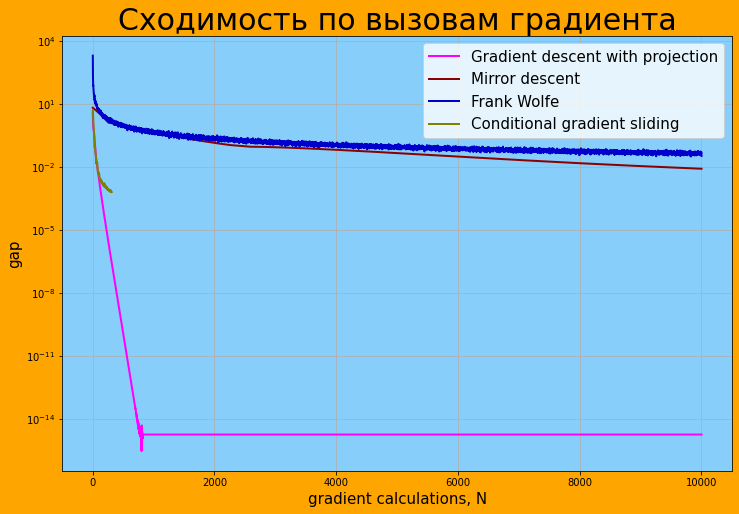

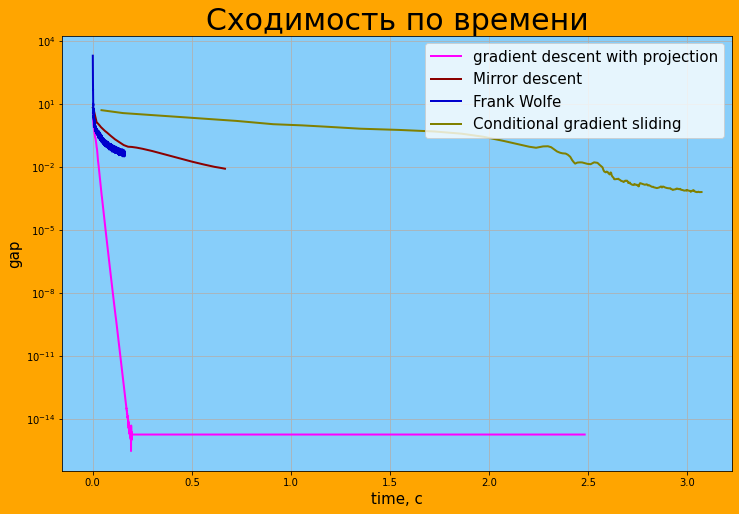

In [16]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line3, = plt.plot(values_x_gdp, values_y_gdp, 'magenta',  linewidth=2, label = 'Gradient descent with projection')
line1, = plt.plot(values_x_md, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
line2, = plt.plot(values_x_fw, values_y_fw, 'mediumblue',  linewidth=2, label = 'Frank Wolfe')
line4, = plt.plot(values_x_cgs, values_y_cgs, 'olive',  linewidth=2, label = 'Conditional gradient sliding')


ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.ylim([10e-500, 10e4])
plt.xlabel("gradient calculations, N", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Сходимость по вызовам градиента', fontsize=30)
plt.grid()



plt.figure(figsize=(12,8), facecolor = "orange") 
line3, = plt.plot(time_gdp, values_y_gdp, 'magenta',  linewidth=2, label = 'gradient descent with projection')
line1, = plt.plot(timeMD, values_y_md, 'darkred',  linewidth=2, label = 'Mirror descent')
line2, = plt.plot(timeFW, values_y_fw, 'mediumblue',  linewidth=2, label = 'Frank Wolfe')
line4, = plt.plot(timeprog_cgs, values_y_cgs, 'olive',  linewidth=2, label = 'Conditional gradient sliding')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.ylim([10e-300, 10e4])
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("time, с", fontsize=15)
plt.ylabel("gap", fontsize=15)
plt.title('Сходимость по времени', fontsize=30)
plt.grid()



#### Вывод:
По количеству вызовов функции подсчета градиента ускоренная версия метода Франка-Вульфа эффективнее обычной версии Франка-Вульфа. Однако по времени ускоренный метод не является столь 'ускоренным' и показывает худший результат. Однако по обоим показателям градиентный спуск с проекцией эффективнее